**В задачи промежуточного проекта входят:**

- Выгрузка и изучение имеющихся данных. Осмысление описания колонок и понимание того, как устроены данные и как они связаны между собой.
- Самостоятельное принятие решений о трактовке спорных моментов в данных. 
- Выполнение операций с данными в рамках заданий проекта.
- Аргументация выполняемых вами действий. Описание причин ваших решений и расчетов, что вы считаете опорными точками в данных (как вы определяете покупку, отток, что такое, по-вашему, не доставленный товар и прочее).
- Исследование данных на наличие аномалий.
- Выводы по заданиям (если вы считаете, что это требуется).
- Практика по работе с Git.
- По желанию — проявление творчества в проекте (графики, таблицы).

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from time import strftime
from datetime import datetime
from datetime import timedelta

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set(
    font_scale=2,
    style='whitegrid',
    rc={'figure.figsize':(25,10)})

In [3]:
df_customers = pd.read_csv('olist_customers_dataset.csv')

In [4]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
df_customers.shape

(99441, 5)

In [6]:
df_customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [7]:
df_orders = pd.read_csv('olist_orders_dataset.csv')

In [8]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
df_orders.shape

(99441, 8)

In [10]:
df_orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [11]:
df_orders[['order_purchase_timestamp',
           'order_approved_at', 
           'order_delivered_carrier_date',
           'order_delivered_customer_date',
           'order_estimated_delivery_date']] = df_orders[['order_purchase_timestamp', 
                                                          'order_approved_at', 
                                                          'order_delivered_carrier_date',
                                                          'order_delivered_customer_date',
                                                          'order_estimated_delivery_date']].apply(pd.to_datetime)

In [12]:
df_orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [13]:
df_order_items = pd.read_csv('olist_order_items_dataset.csv')

In [14]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [15]:
df_order_items.shape

(112650, 7)

In [16]:
df_order_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [17]:
df_order_items['shipping_limit_date'] = pd.to_datetime(df_order_items['shipping_limit_date'])

**1. Сколько у нас пользователей, которые совершили покупку только один раз?**

Буду считать что покупкой является подтверждение заказа, то есть **order_status == approved**

In [18]:
df_customers_and_orders = df_customers.merge(df_orders, on='customer_id')
df_customers_and_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [19]:
# получаю все доставленные заказы
# по уникальному customer_unique_id и считаю их
# затем оставляю только покупки равные одному
# и вывожу количество уникальных
df_customers_and_orders\
    .query('order_status == "delivered"')\
    .groupby('customer_unique_id', as_index=False)\
    .agg({'order_status': 'count'})\
    .query('order_status == 1')\
    .nunique()

customer_unique_id    90557
order_status              1
dtype: int64

**90557 пользователей, которые совершили покупку только один раз**

**2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?**

За причину беру два статуса заказа **canceled** и **unavailable**, так как эти заказы точно не были исполнены

In [20]:
df_canceled_orders = df_orders.sort_values('order_purchase_timestamp')

In [21]:
df_canceled_orders = df_canceled_orders.set_index('order_purchase_timestamp') # для дальнейшего ресемпла

In [22]:
df_canceled_orders = df_canceled_orders.query('order_status == "canceled" or order_status == "unavailable"')

In [23]:
# ресемплируем данные по месяцам
df_canceled_orders = df_canceled_orders\
    .groupby('order_status')\
    .resample(rule='M').agg({'order_id': 'count'}).reset_index()\
    .rename(columns = {'order_id': 'canceled_orders_count'})

In [24]:
# сделаем сводную таблицу
df_canceled_orders = df_canceled_orders.pivot(index = 'order_purchase_timestamp', columns = 'order_status', values = 'canceled_orders_count')

In [25]:
round(df_canceled_orders.mean())

order_status
canceled       24.0
unavailable    26.0
dtype: float64

**В среднем 24 не доставленных заказа в месяц по причине отмены, 26 не доставленных заказа в месяц по причине недоступности**

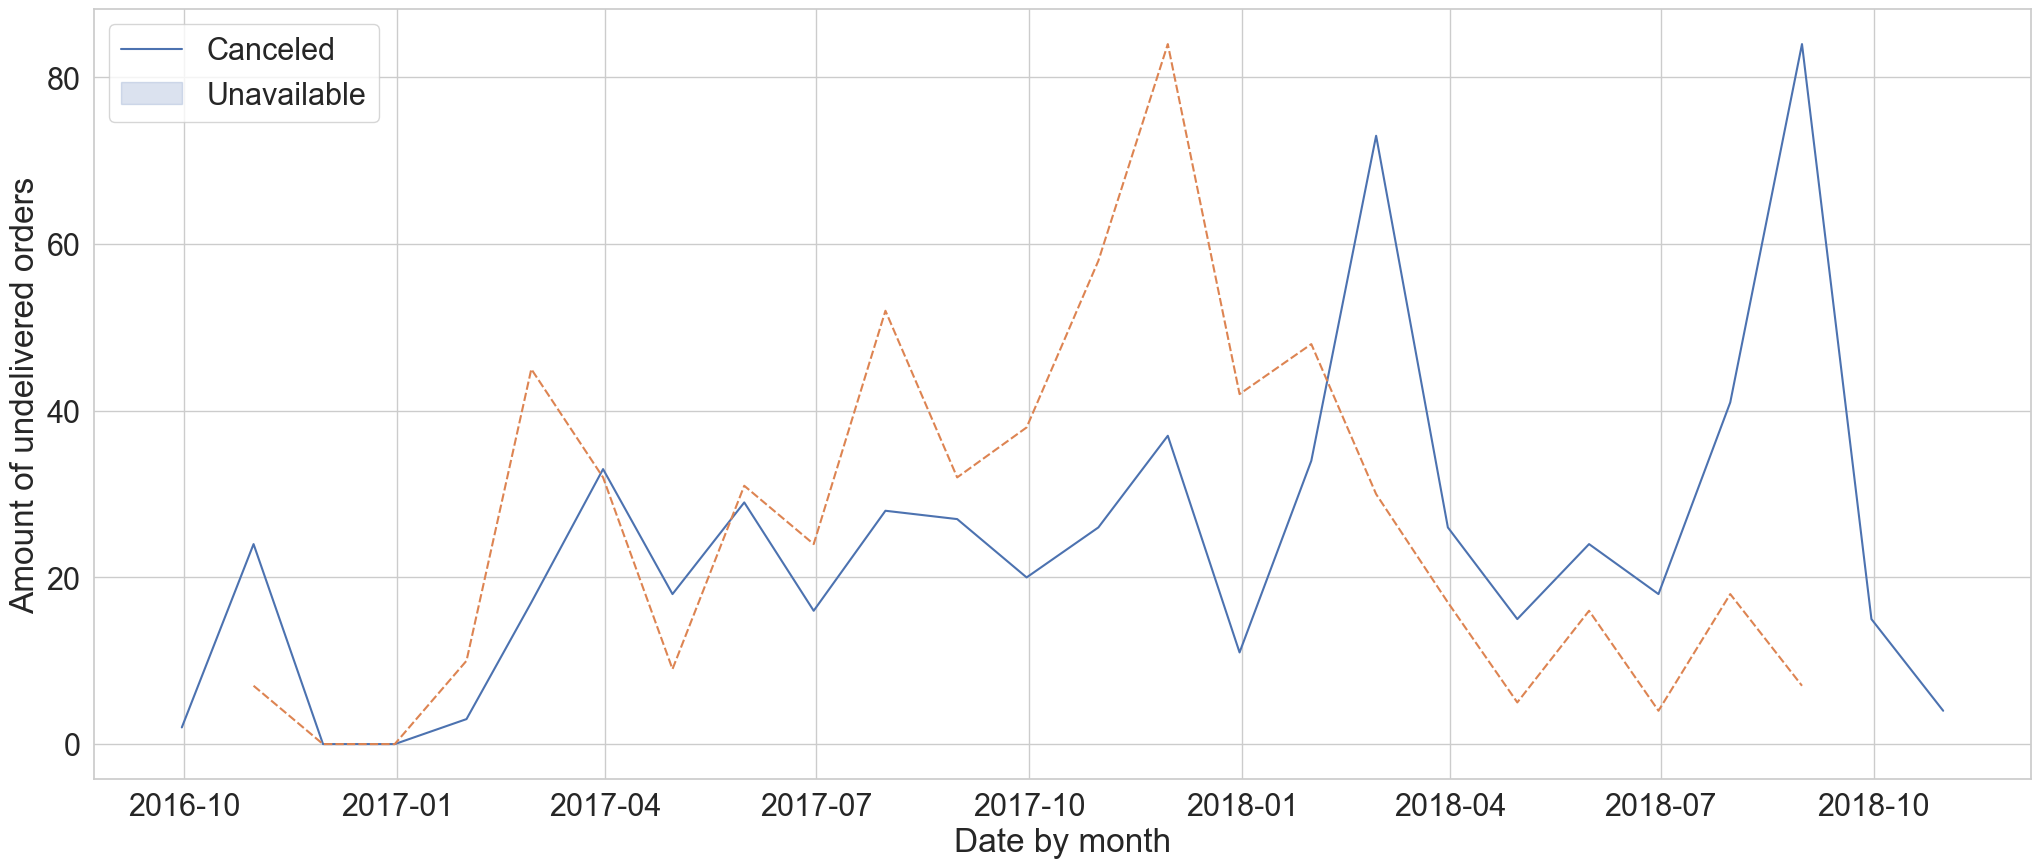

In [26]:
sns.lineplot(data=df_canceled_orders)

plt.xlabel('Date by month')
plt.ylabel('Amount of undelivered orders')
plt.legend(['Canceled', 'Unavailable'])

**3. По каждому товару определить, в какой день недели товар чаще всего покупается.**

In [27]:
most_popular_item_by_day_of_week = df_orders.merge(df_order_items, on='order_id')

In [28]:
# сргруппируем и посчитаем необходимые данные
most_popular_item_by_day_of_week = most_popular_item_by_day_of_week\
    .query('order_status == "delivered"')\
    .groupby(['product_id','order_approved_at'], as_index=False)\
    .agg({'order_status': 'count'})\
    .rename(columns={'order_status': 'orders_count'})

In [29]:
# переведем дату в названия дней недели
most_popular_item_by_day_of_week['order_approved_at'] = most_popular_item_by_day_of_week.order_approved_at.dt.strftime('%A')

In [30]:
# отсортируем
most_popular_item_by_day_of_week = most_popular_item_by_day_of_week\
    .sort_values(['orders_count', 'order_approved_at'], ascending=False)

In [31]:
most_popular_item_by_day_of_week.head()

,product_id,order_approved_at,orders_count
58636,9571759451b1d780ee7c15012ea109d4,Thursday,20
93240,ee3d532c8a438679776d222e997606b3,Saturday,20
21461,37eb69aca8718e843d897aa7b82f462d,Monday,15
54630,89b190a046022486c635022524a974a8,Friday,15
27577,44a5d24dd383324a421569ca697b13c2,Thursday,14


**4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.**

In [32]:
df_customers_and_orders = df_customers.merge(df_orders, on='customer_id')

In [33]:
df_customers_and_orders = df_customers_and_orders.sort_values('order_purchase_timestamp')

In [34]:
# создадим колонку с названием месяца
df_customers_and_orders['order_month'] = df_customers_and_orders['order_purchase_timestamp'].dt.month_name()

In [35]:
# посчитаем количество недель в месяце с помощью dt.days_in_month деленного на 7
df_customers_and_orders['weeks_in_month'] = df_customers_and_orders.order_purchase_timestamp.dt.days_in_month / 7

In [36]:
# Сгруппируем все необходимое и посчитаем покупки
df_customers_and_orders = df_customers_and_orders\
    .query('order_status == "delivered"')\
    .groupby(['order_purchase_timestamp', 'order_month', 'weeks_in_month', 'customer_unique_id'], as_index=False)\
    .agg({'order_id': 'count'})\
    .rename(columns={'order_id': 'orders_count'})

In [38]:
# ресемплируем дату понедельно и считаем среднее
df_customers_and_orders['order_purchase_timestamp'] = df_customers_and_orders\
    .set_index('order_purchase_timestamp')\
    .resample('W')\
    .agg({'orders_count': 'mean'}).reset_index()

ValueError: Columns must be same length as key

In [39]:
# а теперь среднее по количеству недель в месяце
df_customers_and_orders['orders_mean_by_week'] = df_customers_and_orders['orders_count'] / df_customers_and_orders['weeks_in_month']

In [40]:
df_customers_and_orders.head()

,order_purchase_timestamp,order_month,weeks_in_month,customer_unique_id,orders_count,orders_mean_by_week
0,2016-09-15 12:16:38,September,4.285714,830d5b7aaa3b6f1e9ad63703bec97d23,1,0.233333
1,2016-10-03 09:44:50,October,4.428571,32ea3bdedab835c3aa6cb68ce66565ef,1,0.225806
2,2016-10-03 16:56:50,October,4.428571,2f64e403852e6893ae37485d5fcacdaf,1,0.225806
3,2016-10-03 21:13:36,October,4.428571,61db744d2f835035a5625b59350c6b63,1,0.225806
4,2016-10-03 22:06:03,October,4.428571,8d3a54507421dbd2ce0a1d58046826e0,1,0.225806


**5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.**

In [ ]:
# retention = из количества клиентов на конец периода вычесть количество новых клиентов за период, 
# а затем эту разность разделить на количество клиентов на начало периода.

Перед проведением когортного анализа определяют четыре параметра:

- Признак формирования когорты — действие, которое объединяет людей в группу: первый визит, покупка, установка, регистрация и т.п.
- Размер когорты — временной интервал: день, неделя, месяц.
- Отчетный период — время исследования поведения групп.
- Анализируемый ключевой показатель: ROI, Retention Rate, LTV и т.д.

In [41]:
df_customers_and_orders = df_customers.merge(df_orders, on='customer_id')

In [42]:
df_customers_and_orders.order_purchase_timestamp.agg(['min', 'max'])

min   2016-09-04 21:15:19
max   2018-10-17 17:30:18
Name: order_purchase_timestamp, dtype: datetime64[ns]

In [43]:
# надо брать 2017-й год для составления когорт,  так как 2016 и 2018 неполные
df_customers_and_orders = df_customers_and_orders\
    .query('order_purchase_timestamp > "2016-12-31" and order_purchase_timestamp < "2018-01-01" and order_status == "delivered"')

In [44]:
# создадим колонку с датой формата год-месяц
df_customers_and_orders['period'] = df_customers_and_orders.order_purchase_timestamp.dt.strftime('%Y-%m')

In [45]:
# создаем когорты с годом и месяцем, признак формирования - первая покупка
df_customers_and_orders.set_index('customer_unique_id', inplace=True)
df_customers_and_orders['cohort_group'] = df_customers_and_orders.groupby(level=0)['order_purchase_timestamp'].min().dt.strftime('%Y-%m')#.dt.apply(lambda x: x.strftime('%Y-%m'))
df_customers_and_orders.reset_index(inplace=True)

In [46]:
# объединение груп
grouped = df_customers_and_orders.groupby(['cohort_group', 'period'])
# количество уникальных пользователей за период
cohorts = grouped.agg({'customer_unique_id': pd.Series.nunique})
cohorts.rename(columns={'customer_unique_id': 'total_clients'}, inplace=True)

In [47]:
# Создаем периоды когорт
def cohort_period(df):
     df['cohort_period'] = np.arange(len(df)) + 1
     return df
cohorts = cohorts.groupby(level=0).apply(cohort_period)

In [52]:
cohorts.tail(50)

total_clients  cohort_period
cohort_group period                               
2017-03      2017-08              4              6
             2017-09              4              7
             2017-10              8              8
             2017-11              8              9
             2017-12              2             10
2017-04      2017-04           2257              1
             2017-05             14              2
             2017-06              5              3
             2017-07              4              4
             2017-08              6              5
             2017-09              6              6
             2017-10              8              7
             2017-11              7              8
             2017-12              7              9
2017-05      2017-05           3451              1
             2017-06             16              2
             2017-07             16              3
             2017-08             10              4
             2017-09             10              5
             2017-10             11              6
             2017-11             14              7
             2017-12              5              8
2017-06      2017-06           3037              1
             2017-07             15              2
             2017-08             12              3
             2017-09             13              4
             2017-10              9              5
             2017-11             12              6
             2017-12             11              7
2017-07      2017-07           3753              1
             2017-08             20              2
             2017-09             13              3
             2017-10              9              4
             2017-11             11              5
             2017-12              8              6
2017-08      2017-08           4057              1
             2017-09             28              2
             2017-10             14              3
             2017-11             11              4
             2017-12             14              5
2017-09      2017-09           4005              1
             2017-10             28              2
             2017-11             22              3
             2017-12             11              4
2017-10      2017-10           4328              1
             2017-11             31              2
             2017-12             11              3
2017-11      2017-11           7061              1
             2017-12             40              2
2017-12      2017-12           5338              1

In [56]:
cohorts.reset_index(inplace=True)
cohorts.set_index(['cohort_period','cohort_group'], inplace=True)
cohort_group_size = cohorts['total_clients'].groupby(level=1).first()

In [57]:
cohorts['total_clients'].unstack(0)

cohort_period,1,2,3,4,5,6,7,8,9,10,11
cohort_group,,,,,,,,,,,
2017-01,718.0,2.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,3.0,1.0
2017-02,1628.0,3.0,5.0,2.0,7.0,2.0,4.0,3.0,2.0,3.0,2.0
2017-03,2503.0,11.0,9.0,10.0,9.0,4.0,4.0,8.0,8.0,2.0,NaN
2017-04,2257.0,14.0,5.0,4.0,6.0,6.0,8.0,7.0,7.0,NaN,NaN
2017-05,3451.0,16.0,16.0,10.0,10.0,11.0,14.0,5.0,NaN,NaN,NaN
2017-06,3037.0,15.0,12.0,13.0,9.0,12.0,11.0,NaN,NaN,NaN,NaN
2017-07,3753.0,20.0,13.0,9.0,11.0,8.0,NaN,NaN,NaN,NaN,NaN
2017-08,4057.0,28.0,14.0,11.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,4005.0,28.0,22.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
# Выводим доли
df_retention = cohorts['total_clients'].unstack(0).divide(cohort_group_size, axis=0)
df_retention

cohort_period,1,2,3,4,5,6,7,8,9,10,11
cohort_group,,,,,,,,,,,
2017-01,1.0,0.002786,0.002786,0.001393,0.004178,0.001393,0.004178,0.001393,0.001393,0.004178,0.001393
2017-02,1.0,0.001843,0.003071,0.001229,0.004300,0.001229,0.002457,0.001843,0.001229,0.001843,0.001229
2017-03,1.0,0.004395,0.003596,0.003995,0.003596,0.001598,0.001598,0.003196,0.003196,0.000799,NaN
2017-04,1.0,0.006203,0.002215,0.001772,0.002658,0.002658,0.003545,0.003101,0.003101,NaN,NaN
2017-05,1.0,0.004636,0.004636,0.002898,0.002898,0.003187,0.004057,0.001449,NaN,NaN,NaN
2017-06,1.0,0.004939,0.003951,0.004281,0.002963,0.003951,0.003622,NaN,NaN,NaN,NaN
2017-07,1.0,0.005329,0.003464,0.002398,0.002931,0.002132,NaN,NaN,NaN,NaN,NaN
2017-08,1.0,0.006902,0.003451,0.002711,0.003451,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,1.0,0.006991,0.005493,0.002747,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
# для визуализации поменять местами cohort_group и cohort_period
cohorts.reset_index(inplace=True) #реиндекс
cohorts.set_index(['cohort_group','cohort_period'], inplace=True)
# Создадим ряд содержаший размер каждой когорты cohort_group
cohort_group_size = cohorts['total_clients'].groupby(level=0).first()
cohorts['total_clients'].unstack(0)
retention = cohorts['total_clients'].unstack(0).divide(cohort_group_size, axis=1)

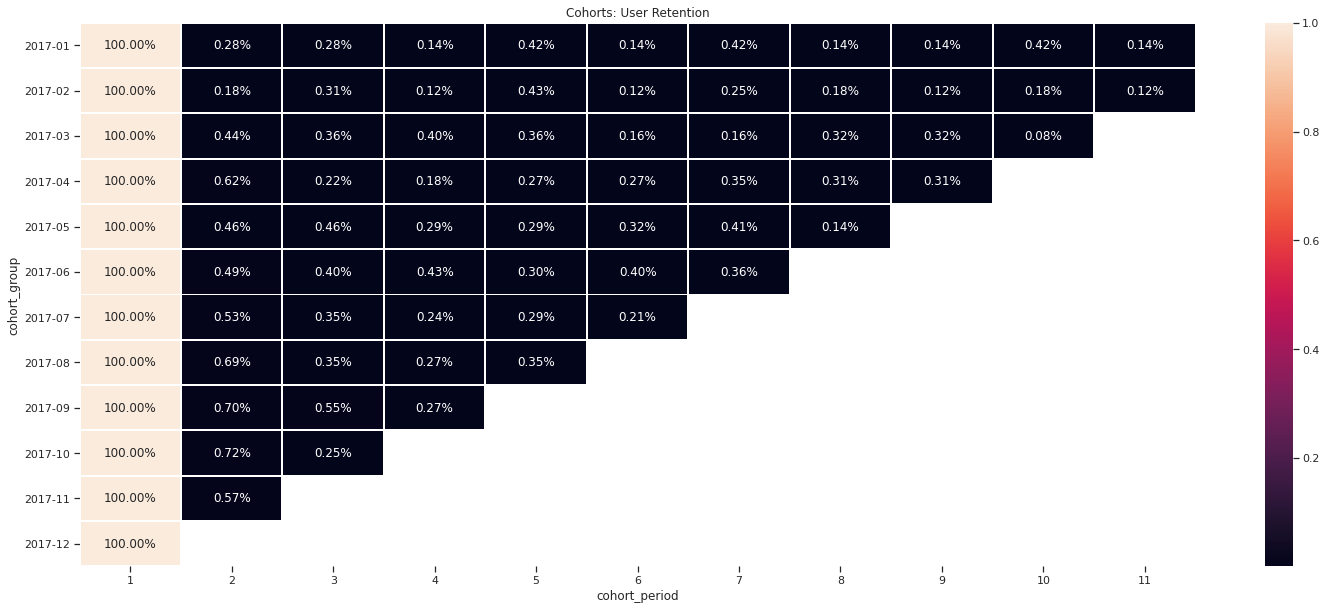

In [60]:
sns.set(style='ticks')
plt.title('Cohorts: User Retention')
sns.heatmap(retention.T, mask=retention.T.isnull(), annot=True, fmt='.2%', linewidths=1)

Когорта с максимальным значеним покупок три месяца подряд после первой, в переод с 01-2017 по 12-2017 - это когорта покупателей с первой покупкой совершонной **2017-09**

**6. Часто для качественного анализа аудитории используют подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю.**

In [61]:
df_rfm = df_customers.merge(df_orders, on='customer_id')

In [62]:
df_rfm = df_rfm.merge(df_order_items, on='order_id')

In [63]:
df_rfm.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [64]:
df_rfm.order_purchase_timestamp.min()

Timestamp('2016-09-04 21:15:19')

In [65]:
df_rfm.order_purchase_timestamp.max()

Timestamp('2018-09-03 09:06:57')

In [66]:
# считаем частоту заказов - frequency, пока что отдельно
frequency = df_rfm['customer_unique_id'].value_counts()

In [67]:
frequency

c8460e4251689ba205045f3ea17884a1    24
4546caea018ad8c692964e3382debd19    21
c402f431464c72e27330a67f7b94d4fb    20
698e1cf81d01a3d389d96145f7fa6df8    20
0f5ac8d5c31de21d2f25e24be15bbffb    18
                                    ..
52c94e8b76cee46397ea911039c8820e     1
deffd690ee36c3962798f6d3500c8ffe     1
38238e269675ff97f16c8727a9ef753e     1
70281191c9c745c080576c931d488398     1
e5dad1efdda6f8a9163d393717b9800f     1
Name: customer_unique_id, Length: 95420, dtype: int64

In [68]:
# создаю новый дф с id и частотой покупок
df_id_frequency = pd.DataFrame({'customer_unique_id': frequency.index, 'frequency': frequency.values})

In [69]:
df_id_frequency = df_id_frequency.set_index('customer_unique_id')

In [70]:
# изучем частоту для дальнейшего составления рейтинга
df_id_frequency.describe(percentiles = [.10, .20, .40, .50, .60, .70, .80, .90, .99])

,frequency
count,95420.00000
mean,1.18057
std,0.62145
min,1.00000
10%,1.00000
20%,1.00000
40%,1.00000
50%,1.00000
60%,1.00000
70%,1.00000


**90% клиентов делали заказ 2 раза и менее, 99% 4 раза и менее**

In [71]:
#посчитаем сумму принесенную каждым клиентом - monetary
df_monetary = df_rfm\
    .groupby(['customer_unique_id', 'price'], as_index=False)\
    .agg({'price': 'sum'})\
    .rename(columns={'price': 'monetary'})

In [72]:
df_monetary.head()

,customer_unique_id,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90
2,0000f46a3911fa3c0805444483337064,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,25.99
4,0004aac84e0df4da2b147fca70cf8255,180.00


In [73]:
# найдем дату последней покупки
df_last_order = df_rfm\
    .sort_values('order_approved_at')\
    .groupby('customer_unique_id', as_index=False).last()\
    .rename(columns={'order_approved_at': 'last_order'})

In [74]:
df_last_order.last_order.head()

0   2018-05-10 11:11:18
1   2018-05-07 18:25:44
2   2017-03-10 21:05:03
3   2017-10-12 20:49:17
4   2017-11-14 20:06:52
Name: last_order, dtype: datetime64[ns]

In [75]:
df_rm = df_last_order.merge(df_monetary, on='customer_unique_id')

In [76]:
df_rm.head()

,customer_unique_id,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,last_order,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,fadbb3709178fc513abc1b2670aa1ad2,7787,cajamar,SP,e22acc9c116caa3f2b7121bbb380d08e,delivered,2018-05-10 10:56:27,2018-05-10 11:11:18,2018-05-12 08:18:00,2018-05-16 20:48:37,2018-05-21,1,372645c7439f9661fbbacfd129aa92ec,da8622b14eb17ae2831f4ac5b9dab84a,2018-05-15 11:11:18,129.90,12.00,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4cb282e167ae9234755102258dd52ee8,6053,osasco,SP,3594e05a005ac4d06a72673270ef9ec9,delivered,2018-05-07 11:11:27,2018-05-07 18:25:44,2018-05-09 12:18:00,2018-05-10 18:02:42,2018-05-15,1,5099f7000472b634fea8304448d20825,138dbe45fc62f1e244378131a6801526,2018-05-11 17:56:33,18.90,8.29,18.90
2,0000f46a3911fa3c0805444483337064,9b3932a6253894a02c1df9d19004239f,88115,sao jose,SC,b33ec3b699337181488304f362a6b734,delivered,2017-03-10 21:05:03,2017-03-10 21:05:03,2017-03-13 12:58:30,2017-04-05 14:38:47,2017-04-07,1,64b488de448a5324c4134ea39c28a34b,3d871de0142ce09b7081e2b9d1733cb1,2017-03-15 21:05:03,69.00,17.22,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,914991f0c02ef0843c0e7010c819d642,66812,belem,PA,41272756ecddd9a9ed0180413cc22fb6,delivered,2017-10-12 20:29:41,2017-10-12 20:49:17,2017-10-13 20:08:19,2017-11-01 21:23:05,2017-11-13,1,2345a354a6f2033609bbf62bf5be9ef6,ef506c96320abeedfb894c34db06f478,2017-10-18 21:49:17,25.99,17.63,25.99
4,0004aac84e0df4da2b147fca70cf8255,47227568b10f5f58a524a75507e6992c,18040,sorocaba,SP,d957021f1127559cd947b62533f484f7,delivered,2017-11-14 19:45:42,2017-11-14 20:06:52,2017-11-16 19:52:10,2017-11-27 23:08:56,2017-12-05,1,c72e18b3fe2739b8d24ebf3102450f37,70a12e78e608ac31179aea7f8422044b,2017-11-22 20:06:52,180.00,16.89,180.00


In [77]:
df_rm.monetary.describe(percentiles = [.10, .20, .40, .50, .60, .70, .80, .90, .99])

count    100759.000000
mean        134.892602
std         208.203950
min           0.850000
10%          25.000000
20%          38.900000
40%          65.000000
50%          84.900000
60%         103.900000
70%         129.900000
80%         169.990000
90%         259.900000
99%         988.675200
max       13440.000000
Name: monetary, dtype: float64

In [78]:
df_rm = df_rm.sort_values('last_order', ascending=False)

In [79]:
df_rm.head()

,customer_unique_id,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,last_order,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,monetary
100411,ff22e30958c13ffe219db7d711e8f564,4b7decb9b58e2569548b8b4c8e20e8d7,2989,sao paulo,SP,54282e97f61c23b78330c15b154c867d,shipped,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-04 15:25:00,NaT,2018-09-06,1,b98992ea80b467987a7fbb88e7f2076a,25be943a321c8938947bdaabca979a90,2018-09-05 17:30:54,145.00,21.46,290.00
14494,24ac2b4327e25baf39f2119e4228976a,898b7fee99c4e42170ab69ba59be0a8b,13483,limeira,SP,35a972d7f8436f405b56e36add1a7140,delivered,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-08-29 16:57:00,2018-08-30 16:23:36,2018-09-05,1,d04857e7b4b708ee8b8b9921163edba3,9f505651f4a6abe901a56cdc21508025,2018-08-31 15:10:26,84.99,8.76,84.99
72113,b701bebbdf478f5500348f03aff62121,496630b6740bcca28fce9ba50d8a26ef,9541,sao caetano do sul,SP,03ef5dedbe7492bdae72eec50764c43f,delivered,2018-08-29 14:52:00,2018-08-29 15:05:22,2018-08-29 20:01:00,2018-08-30 16:36:59,2018-09-03,1,c7f27c5bef2338541c772b5776403e6a,7d7866a99a8656a42c7ff6352a433410,2018-08-31 15:05:22,24.90,8.33,24.90
36449,5c58de6fb80e93396e2f35642666b693,e60df9449653a95af4549bbfcb18a6eb,80045,curitiba,PR,0b223d92c27432930dfe407c6aea3041,delivered,2018-08-29 14:18:23,2018-08-29 14:31:07,2018-08-29 15:29:00,2018-08-30 16:24:55,2018-09-04,1,2b4472df15512a2825ae86fd9ae79335,67bf6941ba2f1fa1d02c375766bc3e53,2018-08-31 14:30:19,209.00,46.48,418.00
50442,7febafa06d9d8f232a900a2937f04338,6e353700bc7bcdf6ebc15d6de16d7002,38600,paracatu,MG,168626408cb32af0ffaf76711caae1dc,delivered,2018-08-29 14:18:28,2018-08-29 14:30:23,2018-08-29 18:51:00,2018-08-30 16:52:31,2018-09-11,1,bdcf6a834e8faa30dac3886c7a58e92e,2a84855fd20af891be03bc5924d2b453,2018-08-31 14:30:23,45.90,15.39,45.90


In [80]:
# посчитаем сколько дней прошло с последней покупки у каждого пользователся - recency
NOW = df_rm['order_purchase_timestamp'].max() + timedelta(days=1)
NOW

Timestamp('2018-09-04 09:06:57')

In [81]:
df_rm['recency'] = df_rm['order_purchase_timestamp'].apply(lambda x: (NOW - x).days)

In [82]:
df_rm.head()

,customer_unique_id,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,last_order,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,monetary,recency
100411,ff22e30958c13ffe219db7d711e8f564,4b7decb9b58e2569548b8b4c8e20e8d7,2989,sao paulo,SP,54282e97f61c23b78330c15b154c867d,shipped,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-04 15:25:00,NaT,2018-09-06,1,b98992ea80b467987a7fbb88e7f2076a,25be943a321c8938947bdaabca979a90,2018-09-05 17:30:54,145.00,21.46,290.00,1
14494,24ac2b4327e25baf39f2119e4228976a,898b7fee99c4e42170ab69ba59be0a8b,13483,limeira,SP,35a972d7f8436f405b56e36add1a7140,delivered,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-08-29 16:57:00,2018-08-30 16:23:36,2018-09-05,1,d04857e7b4b708ee8b8b9921163edba3,9f505651f4a6abe901a56cdc21508025,2018-08-31 15:10:26,84.99,8.76,84.99,5
72113,b701bebbdf478f5500348f03aff62121,496630b6740bcca28fce9ba50d8a26ef,9541,sao caetano do sul,SP,03ef5dedbe7492bdae72eec50764c43f,delivered,2018-08-29 14:52:00,2018-08-29 15:05:22,2018-08-29 20:01:00,2018-08-30 16:36:59,2018-09-03,1,c7f27c5bef2338541c772b5776403e6a,7d7866a99a8656a42c7ff6352a433410,2018-08-31 15:05:22,24.90,8.33,24.90,5
36449,5c58de6fb80e93396e2f35642666b693,e60df9449653a95af4549bbfcb18a6eb,80045,curitiba,PR,0b223d92c27432930dfe407c6aea3041,delivered,2018-08-29 14:18:23,2018-08-29 14:31:07,2018-08-29 15:29:00,2018-08-30 16:24:55,2018-09-04,1,2b4472df15512a2825ae86fd9ae79335,67bf6941ba2f1fa1d02c375766bc3e53,2018-08-31 14:30:19,209.00,46.48,418.00,5
50442,7febafa06d9d8f232a900a2937f04338,6e353700bc7bcdf6ebc15d6de16d7002,38600,paracatu,MG,168626408cb32af0ffaf76711caae1dc,delivered,2018-08-29 14:18:28,2018-08-29 14:30:23,2018-08-29 18:51:00,2018-08-30 16:52:31,2018-09-11,1,bdcf6a834e8faa30dac3886c7a58e92e,2a84855fd20af891be03bc5924d2b453,2018-08-31 14:30:23,45.90,15.39,45.90,5


In [83]:
df_rm.recency.describe(percentiles = [.10, .30, .20, .40, .50, .60, .70, .80, .90, .99])

count    100759.000000
mean        242.658373
std         152.907123
min           1.000000
10%          46.000000
20%          97.000000
30%         139.000000
40%         182.000000
50%         223.000000
60%         273.000000
70%         317.000000
80%         387.000000
90%         471.000000
99%         581.000000
max         729.000000
Name: recency, dtype: float64

**50% процентов клиентов делали покупки последний раз от 223 дней до 729 назад**

In [84]:
# наконец то соеденим все метрики
df_rfm_final = df_rm.merge(df_id_frequency, on=['customer_unique_id'])

In [85]:
df_rfm_final.head()

,customer_unique_id,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,last_order,order_delivered_carrier_date,...,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,monetary,recency,frequency
0,ff22e30958c13ffe219db7d711e8f564,4b7decb9b58e2569548b8b4c8e20e8d7,2989,sao paulo,SP,54282e97f61c23b78330c15b154c867d,shipped,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-04 15:25:00,...,2018-09-06,1,b98992ea80b467987a7fbb88e7f2076a,25be943a321c8938947bdaabca979a90,2018-09-05 17:30:54,145.00,21.46,290.00,1,2
1,24ac2b4327e25baf39f2119e4228976a,898b7fee99c4e42170ab69ba59be0a8b,13483,limeira,SP,35a972d7f8436f405b56e36add1a7140,delivered,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-08-29 16:57:00,...,2018-09-05,1,d04857e7b4b708ee8b8b9921163edba3,9f505651f4a6abe901a56cdc21508025,2018-08-31 15:10:26,84.99,8.76,84.99,5,1
2,b701bebbdf478f5500348f03aff62121,496630b6740bcca28fce9ba50d8a26ef,9541,sao caetano do sul,SP,03ef5dedbe7492bdae72eec50764c43f,delivered,2018-08-29 14:52:00,2018-08-29 15:05:22,2018-08-29 20:01:00,...,2018-09-03,1,c7f27c5bef2338541c772b5776403e6a,7d7866a99a8656a42c7ff6352a433410,2018-08-31 15:05:22,24.90,8.33,24.90,5,1
3,5c58de6fb80e93396e2f35642666b693,e60df9449653a95af4549bbfcb18a6eb,80045,curitiba,PR,0b223d92c27432930dfe407c6aea3041,delivered,2018-08-29 14:18:23,2018-08-29 14:31:07,2018-08-29 15:29:00,...,2018-09-04,1,2b4472df15512a2825ae86fd9ae79335,67bf6941ba2f1fa1d02c375766bc3e53,2018-08-31 14:30:19,209.00,46.48,418.00,5,2
4,7febafa06d9d8f232a900a2937f04338,6e353700bc7bcdf6ebc15d6de16d7002,38600,paracatu,MG,168626408cb32af0ffaf76711caae1dc,delivered,2018-08-29 14:18:28,2018-08-29 14:30:23,2018-08-29 18:51:00,...,2018-09-11,1,bdcf6a834e8faa30dac3886c7a58e92e,2a84855fd20af891be03bc5924d2b453,2018-08-31 14:30:23,45.90,15.39,45.90,5,1


**Начнем сегментацию**

In [86]:
# Будем использовать квинтили. Каждый квинтиль содержит 20% населения. 
# Использование квинтилей является более гибким, поскольку диапазоны будут адаптироваться к данным 
# и будут работать в разных отраслях или в случае каких-либо изменений в ожидаемом поведении клиентов.
quintiles = df_rfm_final[['recency', 'frequency', 'monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'recency': {0.2: 97.0, 0.4: 182.0, 0.6: 273.0, 0.8: 387.0},
 'frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'monetary': {0.2: 38.9, 0.4: 65.0, 0.6: 103.9, 0.8: 169.99}}

In [87]:
def r_score(x):
    """Выставляет recency score"""
    if x <= quintiles['recency'][.2]:
        return 5
    elif x <= quintiles['recency'][.4]:
        return 4
    elif x <= quintiles['recency'][.6]:
        return 3
    elif x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1  

In [88]:
def fm_score(x, c):
    """Выставляет frequency и monetary scores"""
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5  

In [89]:
df_rfm_final['R'] = df_rfm_final['recency'].apply(lambda x: r_score(x))
df_rfm_final['F'] = df_rfm_final['frequency'].apply(lambda x: fm_score(x, 'frequency'))
df_rfm_final['M'] = df_rfm_final['monetary'].apply(lambda x: fm_score(x, 'monetary'))

In [90]:
# Объеденим rfm в общий rfm score для разбития на сегменты
df_rfm_final['RFM_score'] = df_rfm_final['R'].map(str) + df_rfm_final['F'].map(str) + df_rfm_final['M'].map(str)

In [91]:
df_rfm_final.head()

,customer_unique_id,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,last_order,order_delivered_carrier_date,...,shipping_limit_date,price,freight_value,monetary,recency,frequency,R,F,M,RFM_score
0,ff22e30958c13ffe219db7d711e8f564,4b7decb9b58e2569548b8b4c8e20e8d7,2989,sao paulo,SP,54282e97f61c23b78330c15b154c867d,shipped,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-04 15:25:00,...,2018-09-05 17:30:54,145.00,21.46,290.00,1,2,5,5,5,555
1,24ac2b4327e25baf39f2119e4228976a,898b7fee99c4e42170ab69ba59be0a8b,13483,limeira,SP,35a972d7f8436f405b56e36add1a7140,delivered,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-08-29 16:57:00,...,2018-08-31 15:10:26,84.99,8.76,84.99,5,1,5,1,3,513
2,b701bebbdf478f5500348f03aff62121,496630b6740bcca28fce9ba50d8a26ef,9541,sao caetano do sul,SP,03ef5dedbe7492bdae72eec50764c43f,delivered,2018-08-29 14:52:00,2018-08-29 15:05:22,2018-08-29 20:01:00,...,2018-08-31 15:05:22,24.90,8.33,24.90,5,1,5,1,1,511
3,5c58de6fb80e93396e2f35642666b693,e60df9449653a95af4549bbfcb18a6eb,80045,curitiba,PR,0b223d92c27432930dfe407c6aea3041,delivered,2018-08-29 14:18:23,2018-08-29 14:31:07,2018-08-29 15:29:00,...,2018-08-31 14:30:19,209.00,46.48,418.00,5,2,5,5,5,555
4,7febafa06d9d8f232a900a2937f04338,6e353700bc7bcdf6ebc15d6de16d7002,38600,paracatu,MG,168626408cb32af0ffaf76711caae1dc,delivered,2018-08-29 14:18:28,2018-08-29 14:30:23,2018-08-29 18:51:00,...,2018-08-31 14:30:23,45.90,15.39,45.90,5,1,5,1,2,512


**Получили 125 сегментов из всех возможных комбинаций RFM**


Сегмент	- описание
- **top_costumers** - последняя покупка недавно, покупают часто и тратят больше всего
- **loyal_customers** -	покупают на регулярной основе.
- **potential_loyalists** -	недавние клиенты со средней частотой покупок.
- **recent_customers** - последняя покупка совсем недавно, но покупки не частые.
- **promising** - недавние покупатели, с не большыми чеками.
- **customers_needing_attention** - выше средней недавности, частоты и чека.
- **to_sleep** - ниже средней давности и частоты.
- **at_risk** - покупают часто, но последняя покупка была давно.
- **sleep** - Последняя покупка была давно и мало заказов.


In [92]:
# создадим словарь где rfm score - ключ, а сегмент - значение
segt_map = {
    r'[1-2][1-2]': 'sleep',
    r'[1-2][3-4]': 'at_risk',
    r'3[1-2]': 'to_sleep',
    r'33': 'customers_needing_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'recent_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'top_costumers'
}

df_rfm_final['segment'] = df_rfm_final['R'].map(str) + df_rfm_final['F'].map(str)
df_rfm_final['segment'] = df_rfm_final['segment'].replace(segt_map, regex=True)

In [93]:
df_rfm_final.head()

,customer_unique_id,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,last_order,order_delivered_carrier_date,...,price,freight_value,monetary,recency,frequency,R,F,M,RFM_score,segment
0,ff22e30958c13ffe219db7d711e8f564,4b7decb9b58e2569548b8b4c8e20e8d7,2989,sao paulo,SP,54282e97f61c23b78330c15b154c867d,shipped,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-04 15:25:00,...,145.00,21.46,290.00,1,2,5,5,5,555,top_costumers
1,24ac2b4327e25baf39f2119e4228976a,898b7fee99c4e42170ab69ba59be0a8b,13483,limeira,SP,35a972d7f8436f405b56e36add1a7140,delivered,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-08-29 16:57:00,...,84.99,8.76,84.99,5,1,5,1,3,513,recent_customers
2,b701bebbdf478f5500348f03aff62121,496630b6740bcca28fce9ba50d8a26ef,9541,sao caetano do sul,SP,03ef5dedbe7492bdae72eec50764c43f,delivered,2018-08-29 14:52:00,2018-08-29 15:05:22,2018-08-29 20:01:00,...,24.90,8.33,24.90,5,1,5,1,1,511,recent_customers
3,5c58de6fb80e93396e2f35642666b693,e60df9449653a95af4549bbfcb18a6eb,80045,curitiba,PR,0b223d92c27432930dfe407c6aea3041,delivered,2018-08-29 14:18:23,2018-08-29 14:31:07,2018-08-29 15:29:00,...,209.00,46.48,418.00,5,2,5,5,5,555,top_costumers
4,7febafa06d9d8f232a900a2937f04338,6e353700bc7bcdf6ebc15d6de16d7002,38600,paracatu,MG,168626408cb32af0ffaf76711caae1dc,delivered,2018-08-29 14:18:28,2018-08-29 14:30:23,2018-08-29 18:51:00,...,45.90,15.39,45.90,5,1,5,1,2,512,recent_customers


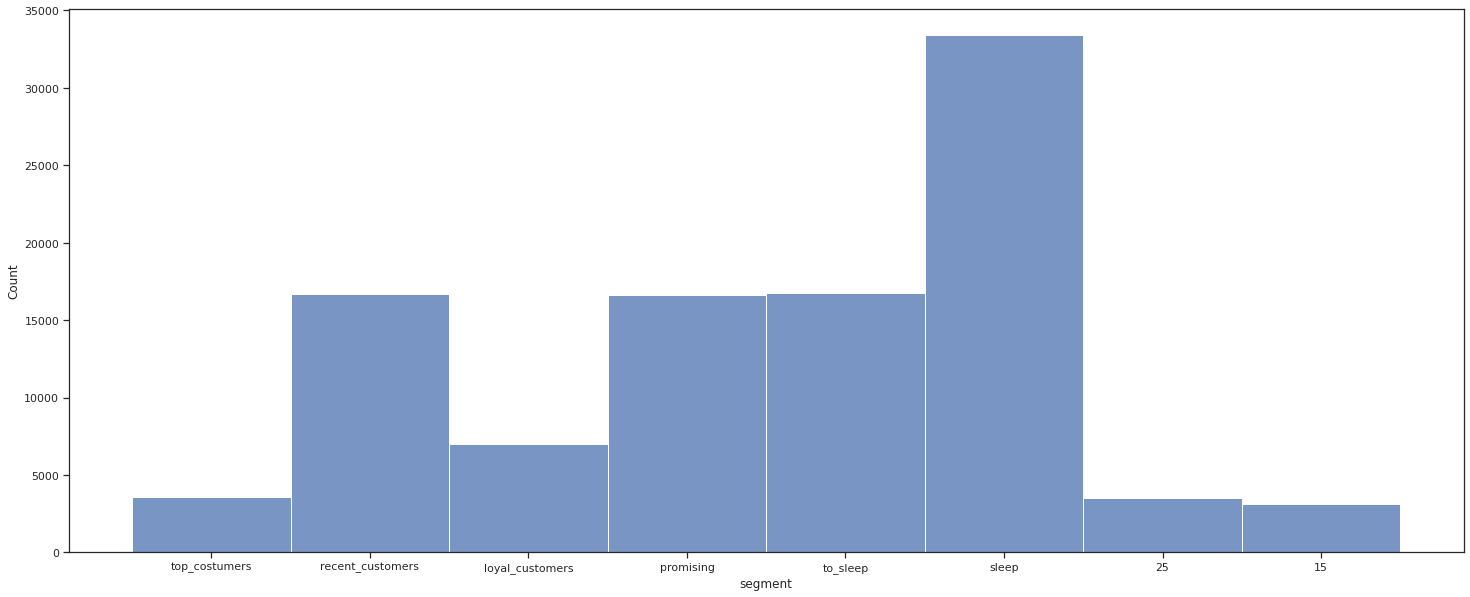

In [94]:
sns.histplot(df_rfm_final.segment)